# Лекция №2

## Гистограммы 

Так что такое гистограмма? Вы можете рассматривать гистограмму как график или график, который дает вам общее представление о распределении интенсивности изображения. Это график со значениями пикселей (от 0 до 255, не всегда) по оси X и соответствующим количеством пикселей в изображении по оси Y.

Это просто еще один способ понять образ. Глядя на гистограмму изображения, вы получаете представление о контрасте, яркости, распределении интенсивности и т. Д. Этого изображения. Почти все инструменты обработки изображений сегодня предоставляют функции на гистограмме. Ниже приведено изображение с веб-сайта Cambridge in Color, и я рекомендую вам посетить этот сайт для получения более подробной информации.

<img src="img/histogram_sample.jpg" alt="Drawing" style="width: 400px;"/>

Вы можете увидеть изображение и его гистограмму. (Помните, эта гистограмма нарисована для изображения в оттенках серого, а не для цветного изображения). Левая область гистограммы показывает количество более темных пикселей на изображении, а правая область показывает количество более ярких пикселей. На гистограмме видно, что темная область больше, чем яркая, а количество полутонов (значения пикселей в среднем диапазоне, скажем, около 127) очень меньше.

#### Найдем гистограмму

Затехать ==>
https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/histogram_calculation/histogram_calculation.html#histogram-calculation

#### Find Histogram

Now we have an idea on what is histogram, we can look into how to find this. Both OpenCV and Numpy come with in-built function for this. Before using those functions, we need to understand some terminologies related with histograms.

$BINS$ :The above histogram shows the number of pixels for every pixel value, ie from 0 to 255. ie you need 256 values to show the above histogram. But consider, what if you need not find the number of pixels for all pixel values separately, but number of pixels in a interval of pixel values? say for example, you need to find the number of pixels lying between 0 to 15, then 16 to 31, ..., 240 to 255. You will need only 16 values to represent the histogram. And that is what is shown in example given in OpenCV Tutorials on histograms.

So what you do is simply split the whole histogram to 16 sub-parts and value of each sub-part is the sum of all pixel count in it. This each sub-part is called "BIN". In first case, number of bins where 256 (one for each pixel) while in second case, it is only 16. BINS is represented by the term histSize in OpenCV docs.

$DIMS$ : It is the number of parameters for which we collect the data. In this case, we collect data regarding only one thing, intensity value. So here it is 1.

$RANGE$ : It is the range of intensity values you want to measure. Normally, it is [0,256], ie all intensity values.



примеры для обработки

https://prophotos.ru/lessons/17582-chto-takoe-gistogramma-uchimsya-chitat-gistogrammu-izobrazheniya

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

### Гистограммы в OpenCV

So now we use cv2.calcHist() function to find the histogram. Let's familiarize with the function and its parameters :

$cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])$

1. $images$ : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
2. $channels$ : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
3. $mask$ : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
4. $histSize$ : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
5. $ranges$ : this is our RANGE. Normally, it is [0,256].

So let's start with a sample image. Simply load an image in grayscale mode and find its full histogram.

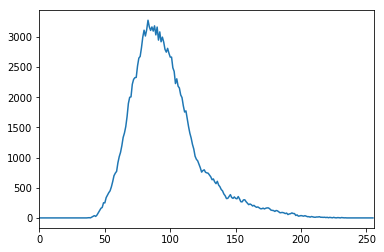

In [79]:
img = cv2.imread('img\\forest_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

hist = cv2.calcHist([img.ravel()], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0,256]);

hist is a 256x1 array, each value corresponds to number of pixels in that image with its corresponding pixel value.

#### Histogram Calculation in Numpy
Numpy also provides you a function, $np.histogram()$. So instead of $calcHist()$ function, you can try below line :

(0, 256)

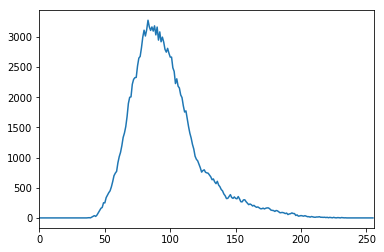

In [40]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
hist,bins = np.histogram(img.ravel(), 256, [0,256])
plt.plot(hist)
plt.xlim([0,256]);

hist is same as we calculated before. But bins will have 257 elements, because Numpy calculates bins as 0-0.99, 1-1.99, 2-2.99 etc. So final range would be 255-255.99. To represent that, they also add 256 at end of bins. But we don't need that 256. Upto 255 is sufficient.

Визуализируем сразу 3 канала цвета:

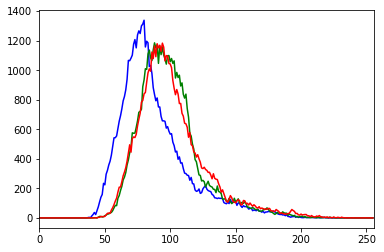

In [39]:
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])

#### Application of Mask
We used $cv2.calcHist()$ to find the histogram of the full image. What if you want to find histograms of some regions of an image? Just create a mask image with white color on the region you want to find histogram and black otherwise. Then pass this as the mask.

In [49]:
print(mask.shape, img.shape)

(108, 113) (194, 291, 3)


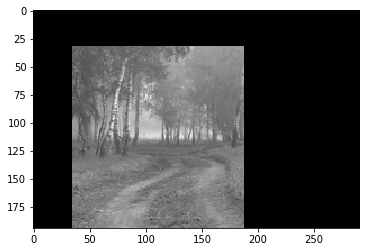

In [87]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
roi = cv2.selectROI(img)
mask[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])] = gray[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
cv2.waitKey(0)
cv2.destroyAllWindows()

#print(mask.shape)

masked_img = cv2.bitwise_and(gray, gray, mask=mask)

## проверим, что мы вырезали то, что хотели
plt.imshow(masked_img, cmap='gray');

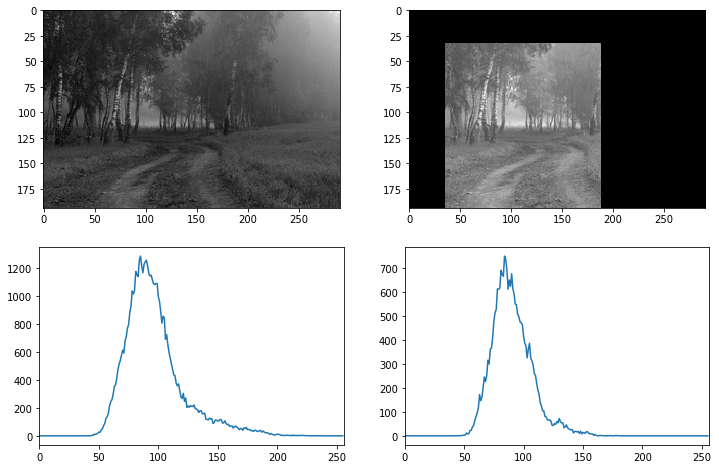

In [89]:
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([gray],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([gray],[0],mask,[256],[0,256])

fig, m_axs = plt.subplots(2, 2, figsize=(12,8))
ax1, ax2 = m_axs

ax1[0].imshow(gray, cmap='gray')
ax1[1].imshow(masked_img, cmap='gray')
ax2[0].plot(hist_full)
ax2[0].set_xlim(0, 256)
ax2[1].plot(hist_mask)
ax2[1].set_xlim(0, 256);

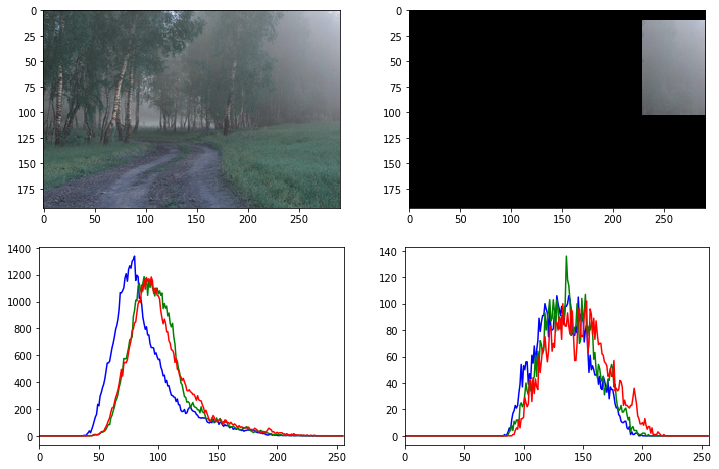

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
roi = cv2.selectROI(img)
mask[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])] = gray[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
cv2.waitKey(0)
cv2.destroyAllWindows()

masked_img = cv2.bitwise_and(img, img, mask=mask)


fig, m_axs = plt.subplots(2, 2, figsize=(12,8))
ax1, ax2 = m_axs

ax1[0].imshow(img, cmap='gray')
ax1[1].imshow(masked_img, cmap='gray')

color = ('b', 'g', 'r')
for i,col in enumerate(color):
    # Calculate histogram with mask and without mask
    # Check third argument for mask
    hist_full = cv2.calcHist([img], [i], None, [256], [0,256])
    hist_mask = cv2.calcHist([img], [i], mask, [256], [0,256])
    ax2[0].plot(hist_full, color=col)
    ax2[0].set_xlim(0, 256)
    ax2[1].plot(hist_mask, color=col)
    ax2[1].set_xlim(0, 256)

## Выравнивание гистограм

Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.

<img src="img/histogram_equalization.png" alt="Drawing" style="width: 400px;"/>


I would recommend you to read the wikipedia page on Histogram Equalization for more details about it. It has a very good explanation with worked out examples, so that you would understand almost everything after reading that. Instead, here we will see its Numpy implementation. After that, we will see OpenCV function.

Нам понадобится функция распределения значений пикслей в градации серого: 

$$cdf(x) = h(0) + h(1) + \dots + h(x)$$ где $h(x) - $ функция гистограммы

Значение функции распределения показывает, какое количество пикселей имеют яркости из отрезка $[0, x]$.

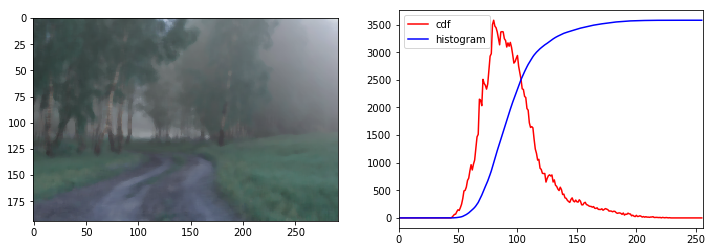

In [81]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img, 5)

hist,bins = np.histogram(img_blur.flatten(),256,[0,256])

cdf = hist.cumsum() ## фунция распределения
cdf_normalized = cdf * hist.max()/ cdf.max()


fig, m_axs = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = m_axs

ax1.imshow(img_blur, cmap='gray')
ax2.plot(hist, color='r')
ax2.plot(cdf_normalized, color='b')
ax2.legend(('cdf','histogram'), loc = 'upper left')
ax2.set_xlim(0, 256)
plt.show();

You can see histogram lies in brighter region. We need the full spectrum. For that, we need a transformation function which maps the input pixels in brighter region to output pixels in full region. That is what histogram equalization does.

Now we find the minimum histogram value (excluding 0) and apply the histogram equalization equation as given in wiki page. But I have used here, the masked array concept array from Numpy. For masked array, all operations are performed on non-masked elements. You can read more about it from Numpy docs on masked arrays.

In [82]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min()) ## выравнивание к линейному распределению
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

Now we have the look-up table that gives us the information on what is the output pixel value for every input pixel value. So we just apply the transform.

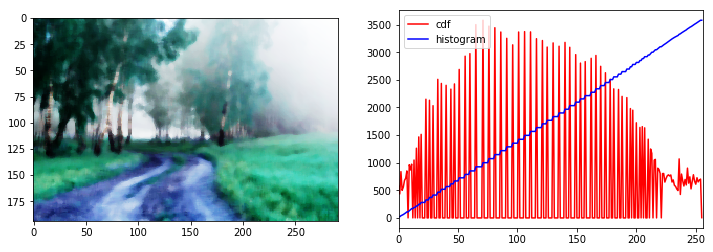

In [83]:
img2 = cdf[img_blur]

hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max()/ cdf2.max()


fig, m_axs = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = m_axs

ax1.imshow(img2, cmap='gray')
ax2.plot(hist2, color='r')
ax2.plot(cdf_normalized2, color='b')
ax2.legend(('cdf','histogram'), loc = 'upper left')
ax2.set_xlim(0, 256)
plt.show();

OpenCV has a function to do this, $cv2.equalizeHist()$. Its input is just grayscale image and output is our histogram equalized image.

Below is a simple code snippet showing its usage for same image we used :

## Адаптивный эквалайзер с ограниченной адаптивной гистограммой (CLAHE)

The first histogram equalization we just saw, considers the global contrast of the image. In many cases, it is not a good idea. For example, below image shows an input image and its result after global histogram equalization

### $$Тут \ расшар \ алгоритма \dots $$  

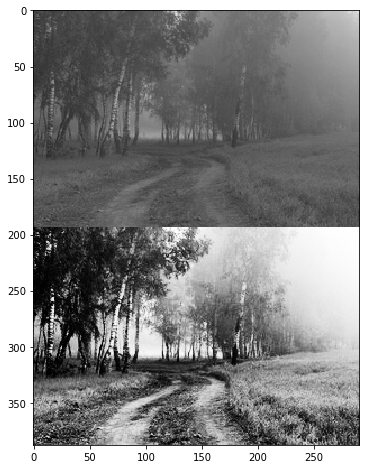

In [158]:
## вспомним, что было с линиаризацией освещенности
img = cv2.imread('img\\forest_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
equ = cv2.equalizeHist(gray)

res = np.vstack((gray, equ))
plt.figure(figsize=(12,8))
plt.imshow(res, cmap='gray');

It is true that the background contrast has improved after histogram equalization. But compare the face of statue in both images. We lost most of the information there due to over-brightness. It is because its histogram is not confined to a particular region as we saw in previous cases (Try to plot histogram of input image, you will get more intuition).

So to solve this problem, $adaptive histogram equalization$ is used. In this, image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, $contrast limiting$ is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

Below code snippet shows how to apply CLAHE in OpenCV:

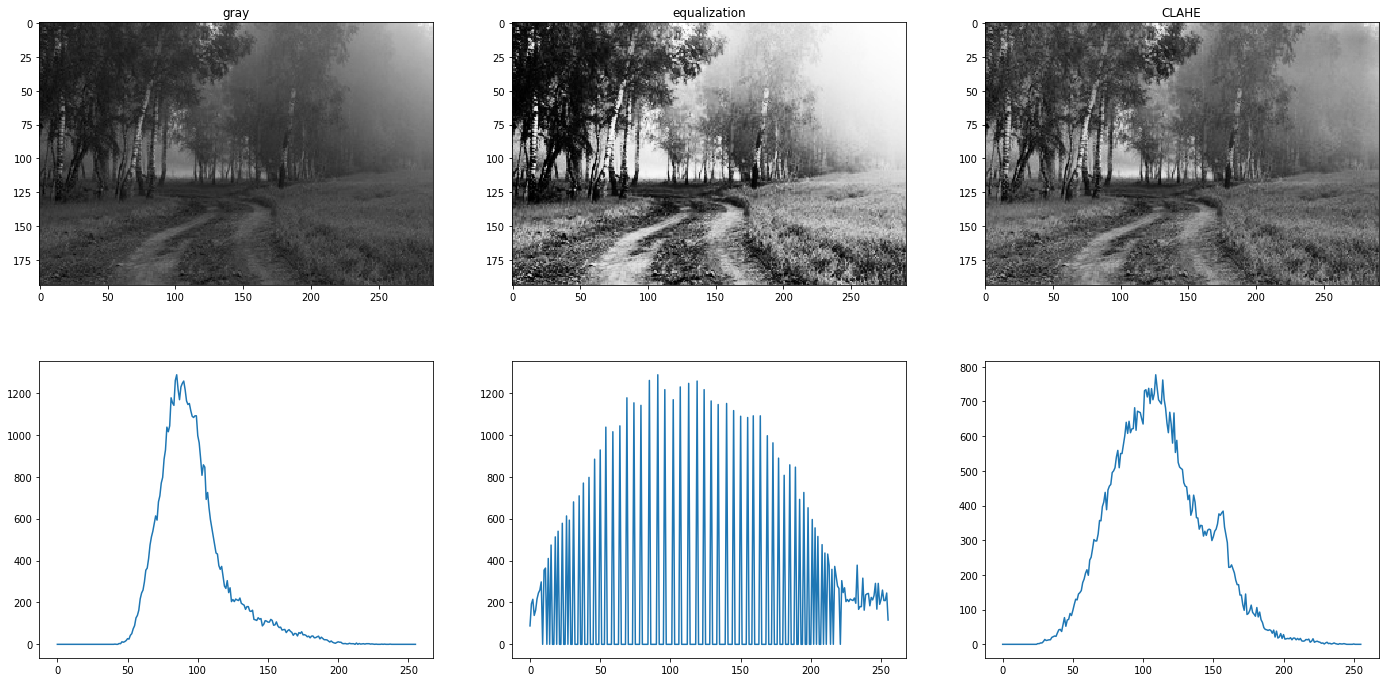

In [171]:
## бахнем CLAHE и сравним все
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray)
res = np.hstack((gray, equ, cl1))

hist_gray = cv2.calcHist([gray],[0],None,[256],[0,256])
hist_equ = cv2.calcHist([equ],[0],None,[256],[0,256])
hist_clahe = cv2.calcHist([cl1],[0],None,[256],[0,256])

fig, m_axs = plt.subplots(2, 3, figsize=(24, 12))
ax1, ax2 = m_axs

ax1[0].set_title('gray')
ax1[0].imshow(gray, cmap='gray')
ax1[1].set_title('equalization')
ax1[1].imshow(equ, cmap='gray')
ax1[2].set_title('CLAHE')
ax1[2].imshow(cl1, cmap='gray')

ax2[0].plot(hist_gray)
ax2[1].plot(hist_equ)
ax2[2].plot(hist_clahe);

## Сравнение гистограмм 


Безусловно, что пользы от гистограмм не будет никакой, если не сравнивать их с эталонными диаграммами. Предположим, есть эталонное изображение – какой-то объект заданных размеров. Также есть множество неизвестных изображений, на которых нужно найти эталонное изображение. Для этого нужно перебирать участки изображений, сравнивая содержимое с эталоном. Можно сравнивать каждую точку из участка, но это будет медленно. Гораздо быстрее по ресурсам – это сравнить гистограммы яркости. Для сравнения гистограмм в OpenCV предусмотрена функция $cvCompareHist()$.

Мы рассмотрим только одну метрику сравнения cv2.HISTCMP_CORREL 


### $$Тут\ краткий\ расшар\ про\ коэффицент\ корреляции\ Пирсона\dots $$

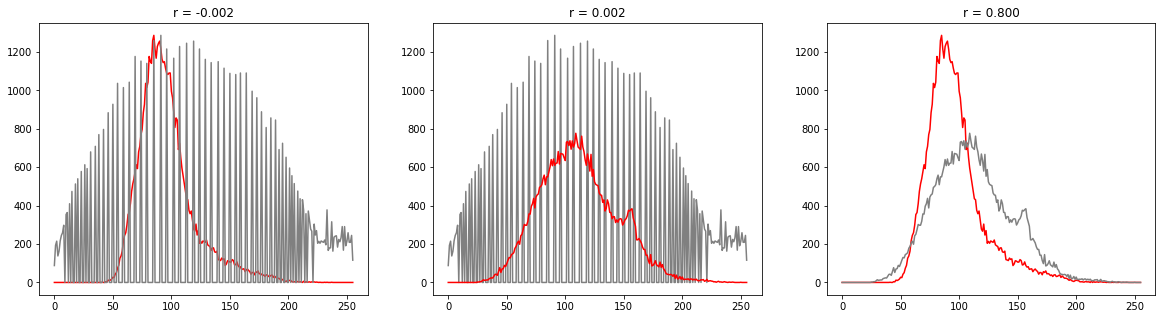

In [190]:
# возьмем выравненные гистограммы освещенности и сравним через корреляцию

## коэффицент корреляции между gray и equalization
cor_ge = cv2.compareHist(hist_gray, hist_equ, cv2.HISTCMP_CORREL)
## коэффицент корреляции между clahe и equalization
cor_ec = cv2.compareHist(hist_equ, hist_clahe, cv2.HISTCMP_CORREL)
## коэффицент корреляции между gray и clahe
cor_gc = cv2.compareHist(hist_gray, hist_clahe, cv2.HISTCMP_CORREL)

fig, m_axs = plt.subplots(1, 3, figsize=(20, 5))
ax1, ax2, ax3 = m_axs

ax1.set_title('r = {:.3f}'.format(cor_ge))
ax1.plot(hist_gray, color='r')
ax1.plot(hist_equ, color='gray')

ax2.set_title('r = {:.3f}'.format(cor_ec))
ax2.plot(hist_equ, color='gray')
ax2.plot(hist_clahe, color='r')

ax3.set_title('r = {:.3f}'.format(cor_gc))
ax3.plot(hist_gray, color='r')
ax3.plot(hist_clahe, color='gray');


#### Вопросы на засыпку:

1. Как найти оптимальные параметры для clahe (поварируйте параметры)?

2. Как коррелируют гистограммы clahe и первичная?

3. Что будет с нормальной фоткой после clahe?

4. Как сделать clahe к цветному изображению?

5. Что будет, если $CLAHE$ применить к другим формата кодирования цвета: HSV, LAB? Какой формат кодирования лучше подходит для работы с коррекцией цвета?

6. Что будет, если $equalization$ применить к другим формата кодирования цвета: HSV, LAB? Какой формат кодирования лучше подходит для работы с коррекцией цвета?

### Домашнаяя работа #2

Часто при анализе изображений местности необходимо понять ее характер. В частности, если определить, что на изображении преобладет вода, то имеет смысл искать корабли на таком изображении. Если на картинке густой лес, то, возможно, это не лучшая зона для посадки дрона или беспилотника.

Ваша задача - написать программу, которая будет отличать лес от пустыни. В приложении можно найти реальные спутниковые снимки лесов и пустынь. Подобные примеры изображений присутствуют в тесте

Примеры изображений:
<img src="src/desert_forest/task_img/test_image_00.jpg" alt="Drawing" style="width: 200px;"/>
<img src="src/desert_forest/task_img/test_image_06.jpg" alt="Drawing" style="width: 200px;"/>

### *CLAHE для цветной коррекции

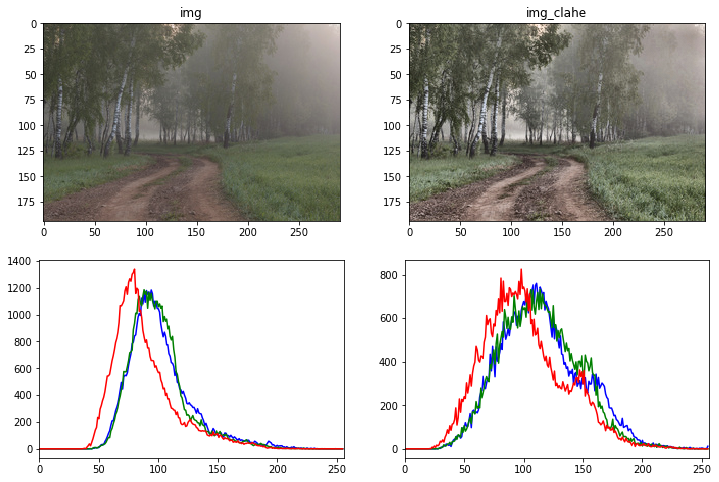

In [168]:
img = cv2.imread('img\\forest_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2., tileGridSize=(8,8))

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2,a,b))  # merge channels
img_clahe = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR


fig, m_axs = plt.subplots(2, 2, figsize=(12,8))
ax1, ax2 = m_axs

ax1[0].set_title('img')
ax1[0].imshow(img)
ax1[1].set_title('img_clahe')
ax1[1].imshow(img_clahe)

color = ('b', 'g', 'r')
for i,col in enumerate(color):
    # Calculate histogram with mask and without mask
    # Check third argument for mask
    hist_full = cv2.calcHist([img], [i], None, [256], [0,256])
    hist_clahe = cv2.calcHist([img_clahe], [i], None, [256], [0,256])
    ax2[0].plot(hist_full, color=col)
    ax2[0].set_xlim(0, 256)
    ax2[1].plot(hist_clahe, color=col)
    ax2[1].set_xlim(0, 256)

А ведь можно корректировать цвет только в заданной области $\dots$

## Convolutions

#### Basics of convolutions

Convolutions is a technique for general signal processing. People studying electrical/electronics will tell you the near infinite sleepless nights these convolutions have given them. Entire books have been written on this topic. And the questions and theorems that need to be proved are [insurmountable]. But for computer vision, we'll just deal with some simple things.

### Definition
First, let's see the mathematical definition of convolution in discrete time domain. Later we will walk through what this equation tells us. 
(We will discuss in discrete time domain only.) 

\begin{align}
\ y[n] & = x[n] * h[n] = \sum_{k=-\infty}^\infty x[k] \cdot h[n-k]
\end{align}

where x[n] is input signal, 

h[n] is impulse response, 

and y[n] is output,

$*$ denotes convolution. 

Notice that we multiply the terms of x[k] by the terms of a time-shifted h[n] and add them up. 

The keystone of understanding convolution is lying behind impulse response and impulse decomposition.

### Impulse Function Decomposition

In order to understand the meaning of convolution, we are going to start from the concept of signal decomposition. The input signal is decomposed into simple additive components, and the system response of the input signal results in by adding the output of these components passed through the system.

In general, a signal can be decomposed as a weighted sum of basis signals. For example, in Fourier Series, any periodic signal (even rectangular pulse signal) can be represented by a sum of sine and cosine functions. But here, we use impulse (delta) functions for the basis signals, instead of sine and cosine.

Examine the following example how a signal is decomposed into a set of impulse (delta) functions. Since the impulse function, δ[n] is 1 at n=0, and zeros at n ≠ 0. x[0] can be written to 2·δ[n]. And, x[1] will be 3·δ[n-1], because δ[n-1] is 1 at n=1 and zeros at others. In same way, we can write x[2] by shifting δ[n] by 2, x[2] = 1·δ[n-2]. Therefore, the signal, x[n] can be represented by adding 3 shifted and scaled impulse functions.

<img src="img/conv_img01.png" alt="Drawing" style="width: 200px;"/> 
\begin{align}
\ x[0] = x[0] \cdot \delta[n-0] = 2 \cdot \delta[n-0]\\
\ x[1] = x[1] \cdot \delta[n-1] = 3 \cdot \delta[n-1]\\
\ x[2] = x[2] \cdot \delta[n-2] = 1 \cdot \delta[n-2]\\
\end{align}

In general, a signal can be written as sum of scaled and shifted delta functions;

\begin{align}
\ x[n] = \sum_{k=-\infty}^\infty x[k] \cdot \delta[n-k] = x[0] \cdot \delta[n-0] + x[1] \cdot \delta[n-1] + x[2] \cdot \delta[n-2]\\
\end{align}


### Impulse Response

Impulse response is the output of a system resulting from an impulse function as input. 
And it is denoted as h[n]. Вся волшебство именно тут. Для вас это перестанет быть магией на 2-3 курсе инстиута. Ну, или не перестанет...


<table><tr>
    <td> <img src="img/conv_img02.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

### Convolution in 2D

2D convolution is just extension of previous 1D convolution by convolving both horizontal and vertical directions in 2 dimensional spatial domain. Convolution is frequently used for image processing, such as smoothing, sharpening, and edge detection of images. 

The impulse (delta) function is also in 2D space, so δ[m, n] has 1 where m and n is zero and zeros at m,n ≠ 0. The impulse response in 2D is usually called "kernel" or "filter" in image processing. 


<table><tr>
    <td> <img src="img/conv2d_delta.jpg" alt="Drawing" style="width: 300px;"/> </td>
    <td> <img src="img/conv_img10.png" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

And, the output of linear and time invariant system can be written by convolution of input signal x[m, n], and impulse response, h[m, n]; 

\begin{align}
\ y[m,n] & = x[m,n] * h[m,n] = \sum_{j=-\infty}^\infty \sum_{i=-\infty}^\infty x[i,j] \cdot h[m-i,n-j]
\end{align}

Examine an example to clarify how to convolve in 2D space. 
Let's say that the size of impulse response (kernel) is 3x3, and it's values are a, b, c, d,... 

Notice the origin (0,0) is located in the center of the kernel. 

Let's pick a simplest sample and compute convolution, for instance, the output at (1, 1) will be;
<img src="img/conv_img11.png" alt="Drawing" style="width: 200px;"/>

\begin{align}
\ y[1,1] & = \sum_{j=0}^2 \sum_{i=0}^2 x[i,j] \cdot h[1-i,1-j]  \\ &
\ = x[0,0] \cdot h[1,1] + x[1,0] \cdot h[0,1] + x[2,0] \cdot h[-1,1] \\ &
\ + x[0,1] \cdot h[1,0] + x[1,1] \cdot h[0,0] + x[2,1] \cdot h[-1,0] \\ &
\ + x[0,2] \cdot h[1,-1] + x[1,2] \cdot h[0,-1] + x[2,2] \cdot h[-1,-1] \\&
\end{align}

Exercise a little more about 2D convolution with an another example. Suppose we have 3x3 input and 3x3 kernel matrices as follow.

Input | Kernel | Output
-|-|-
<img src="img/conv_img15.png" alt="Drawing" style="width: 200px;"/> | <img src="img/conv_img16.png" alt="Drawing" style="width: 200px;"/> | <img src="img/conv_img17.png" alt="Drawing" style="width: 200px;"/>

The ouput at (1, 1) for this example will be:
\begin{align}
\ y[1,1] & = \sum_{j=0}^2 \sum_{i=0}^2 x[i,j] \cdot h[1-i,1-j]  \\ &
\ = x[0,0] \cdot h[1,1] + x[1,0] \cdot h[0,1] + x[2,0] \cdot h[-1,1] \\ &
\ + x[0,1] \cdot h[1,0] + x[1,1] \cdot h[0,0] + x[2,1] \cdot h[-1,0] \\ &
\ + x[0,2] \cdot h[1,-1] + x[1,2] \cdot h[0,-1] + x[2,2] \cdot h[-1,-1] \\&
\ = 1 \cdot 1 + 2 \cdot 2 + 3 \cdot 1 \\ &
\ + 4 \cdot 0 + 5 \cdot 0 + 6 \cdot 0 \\ &
\ + 7 \cdot (-1) + 8 \cdot (-2) + 9 \cdot (-1) \\ &
\ = -24 \\
\end{align}


## 2D Convolution  (Image Filtering)

As in one-dimensional signals, images also can be filtered with various low-pass filters(LPF), high-pass filters(HPF) etc. LPF helps in removing noises, blurring the images etc. HPF filters helps in finding edges in the images.

OpenCV provides a function $cv2.filter2D()$ to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like below:

$$
\begin{equation*}
\ K = \frac{1}{25} \begin{vmatrix}
1 & \ 1 & \ 1 & \ 1 & \ 1 \\
1 & \ 1 & \ 1 & \ 1 & \ 1 \\
1 & \ 1 & \ 1 & \ 1 & \ 1 \\
1 & \ 1 & \ 1 & \ 1 & \ 1 \\
1 & \ 1 & \ 1 & \ 1 & \ 1 
\end{vmatrix}
\end{equation*}
$$

Operation is like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take its average and replace the central pixel with the new average value. It continues this operation for all the pixels in the image. Try this code and check the result:

In [191]:
## code

## Image Blurring (Image Smoothing)

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation. (Well, there are blurring techniques which doesn't blur the edges too). OpenCV provides mainly four types of blurring techniques.

### 1. Averaging
This is done by convolving image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replace the central element. This is done by the function $cv2.blur()$ or $cv2.boxFilter()$. Check the docs for more details about the kernel. We should specify the width and height of kernel. A 3x3 normalized box filter would look like below:

$$
\begin{equation*}
\ K = \frac{1}{9} \begin{vmatrix}
1 & \ 1 & \ 1 \\ 
1 & \ 1 & \ 1 \\ 
1 & \ 1 & \ 1 
\end{vmatrix}
\end{equation*}
$$

In [192]:
## code

### 2. Gaussian Blurring
In this, instead of box filter, gaussian kernel is used. It is done with the function, $cv2.GaussianBlur()$. We should specify the width and height of kernel which should be positive and odd. We also should specify the standard deviation in X and Y direction, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as same as sigmaX. If both are given as zeros, they are calculated from kernel size. Gaussian blurring is highly effective in removing gaussian noise from the image.

If you want, you can create a Gaussian kernel with the function, $cv2.getGaussianKernel()$.

The above code can be modified for Gaussian blurring:

In [ ]:
## code

### 3. Median Blurring

Here, the function __cv2.medianBlur()__ takes median of all the pixels under kernel area and central element is replaced with this median value. This is highly effective against salt-and-pepper noise in the images. Interesting thing is that, in the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

In this demo, I added a 50% noise to our original image and applied median blur. Check the result:

### 4. Bilateral Filtering

__cv2.bilateralFilter()__ is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that gaussian filter takes the a neighbourhood around the pixel and find its gaussian weighted average. This gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost same intensity. It doesn't consider whether pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filter also takes a gaussian filter in space, but one more gaussian filter which is a function of pixel difference. Gaussian function of space make sure only nearby pixels are considered for blurring while gaussian function of intensity difference make sure only those pixels with similar intensity to central pixel is considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

Below samples shows use bilateral filter (For details on arguments, visit docs).

In [ ]:
## code

## Morphological Transformations

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. We will see them one-by-one with help of following image:

<img src="img/j.png" alt="Drawing" style="width: 100px;"/>

__Эрозия__ (размывание/сужение) изображения обычно используется для избавления от случайных вкраплений на изображении. Идея состоит в том, что вкрапления при размывании устранятся, тогда как крупные и соответсвенно более визуально-значимые регионы остаются.

__Растягивание__ (расширение) же, по идее, так же должно устранять шум и способствовать объединению областей изображения, которые были разделены шумом, тенями, etc.
Применение же небольшого растягивания должно сплавить эти области в одну.

Морфологические операции, чаще всего, применяются над двоичными изображениями, которые получаются после порогового преобразования (thresholding).

### 1. Erosion
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, I would use a 5x5 kernel with full of ones. Let's see it how it works:

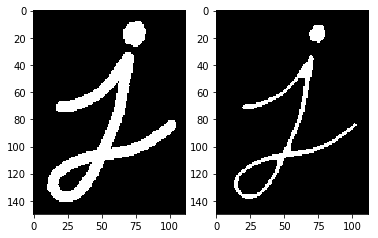

In [399]:
import cv2
import numpy as np

img = cv2.imread('img/j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs
ax1.imshow(img, cmap='gray')
ax2.imshow(erosion, cmap='gray');

### 2. Dilation
It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

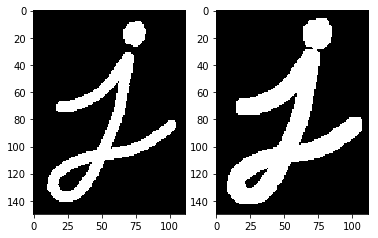

In [398]:
dilation = cv2.dilate(img,kernel,iterations = 1)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs
ax1.imshow(img, cmap='gray')
ax2.imshow(dilation, cmap='gray');

### 3. Opening
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, __cv2.morphologyEx()__

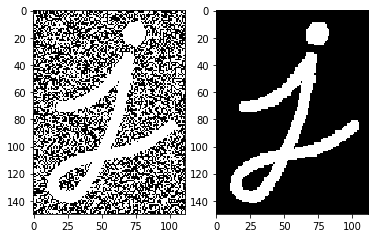

In [374]:
## внесем шум
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.ones(noise_img.shape) * 255
noise_img[mask] = r[mask]

opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs
ax1.imshow(noise_img, cmap='gray')
ax2.imshow(opening, cmap='gray');

### 4. Closing
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

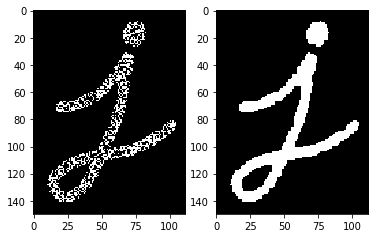

In [391]:
## внесем шум
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.zeros(noise_img.shape)
noise_img[mask] = r[mask]

opening = cv2.morphologyEx(noise_img, cv2.MORPH_CLOSE, kernel)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs
ax1.imshow(noise_img, cmap='gray')
ax2.imshow(opening, cmap='gray');

### 5. Morphological Gradient
It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

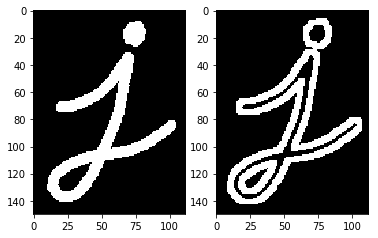

In [394]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

fig, m_axs = plt.subplots(1, 2, figsize=(6, 4))
ax1, ax2 = m_axs
ax1.imshow(img, cmap='gray')
ax2.imshow(gradient, cmap='gray');

In [12]:
img = cv2.imread('img\\lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

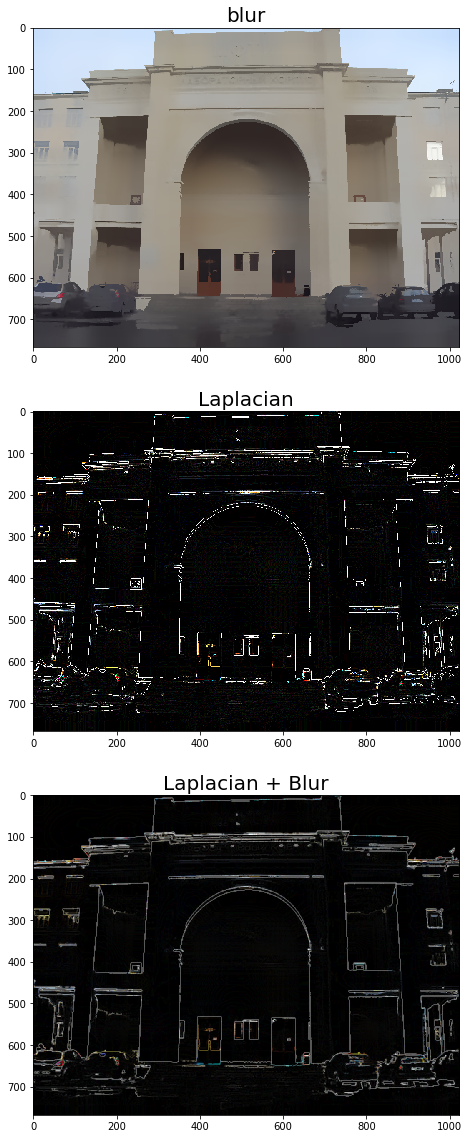

In [15]:
# Теперь пощупаем несколько филттров и их комбинации --- Это для лекции №3
    
## Лапласиан 
kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=np.float32)/0.1

## переведем изображение в оттенки серого - цвет нам тут не нужен
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)


## Попробуем несколько типов блюра 
blur = cv2.blur(gray, (3,3))                       ## осреднение значений в ядре 
gaus_blur = cv2.GaussianBlur(gray, (5,5), 0)       ## гауссов блюр 
median_blur = cv2.medianBlur(gray, 5)              ## медиана всех значений в ядре 
bil_blur = cv2.bilateralFilter(gray, 9, 75, 75)    ## двусторонниый фильтр 
pyr_d = cv2.pyrDown(gray)                          ## blur & downsampling
pyr_u = cv2.pyrUp(gray)                            ## blur & upsampling 
pyr_mean = cv2.pyrMeanShiftFiltering(img, 25, 40)  ## выделяет области по цвету (аналог knn в машинке)

#gray_pyr_mean = cv2.cvtColor(pyr_mean, cv2.COLOR_RGB2GRAY)

## Применяем фильтры 
dst = cv2.filter2D(pyr_mean, -1, kernel)           ## находим границы лапласианом
#dst_blur = cv2.GaussianBlur(dst, (5,5),0)
dst_blur = cv2.blur(dst, (3,3))                    ## еще раз блюрим для гладких границ 

## Визуализация
fig, m_axs = plt.subplots(3, 1, figsize=(24, 20))
ax1, ax2, ax3 = m_axs

plt.gray()
ax1.set_title('blur', fontsize=20)
ax1.imshow(pyr_mean)
ax2.set_title('Laplacian', fontsize=20)
ax2.imshow(dst)
ax3.set_title('Laplacian + Blur', fontsize=20)
ax3.imshow(dst_blur);

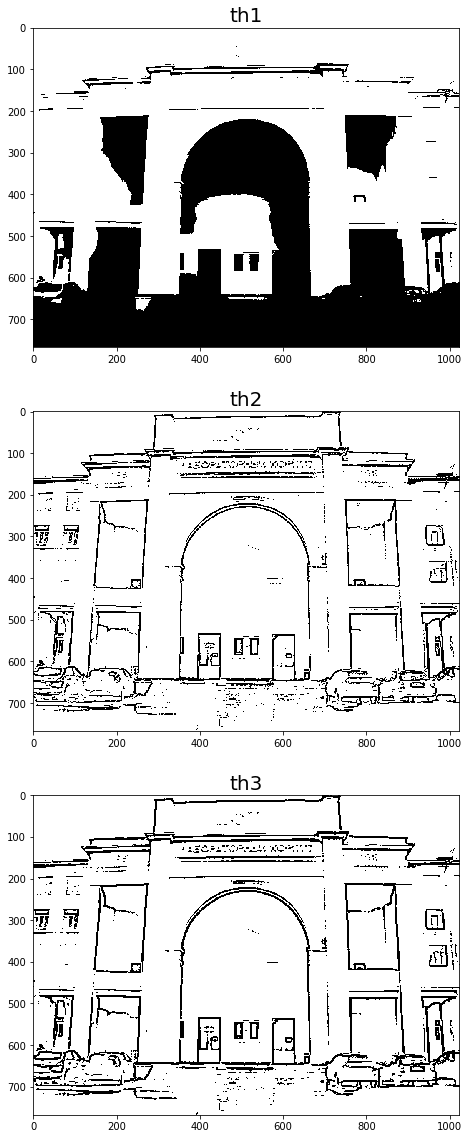

In [16]:
img = cv2.imread('img\\lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.pyrMeanShiftFiltering(img, 25, 40)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)[1]
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)

## Визуализация
fig, m_axs = plt.subplots(3, 1, figsize=(24, 20))
ax1, ax2, ax3 = m_axs

plt.gray()
ax1.set_title('th1', fontsize=20)
ax1.imshow(th1)
ax2.set_title('th2', fontsize=20)
ax2.imshow(th2)
ax3.set_title('th3', fontsize=20)
ax3.imshow(th3);